# 모두를 위한 딥러닝 : Pytorch
## Lecture 4-1 - Multivariate Linear Regression
본 문서는 모두를 위한 딥러닝 강의를 듣고 공부 목적으로 작성되었습니다.

### Theoritical Overview
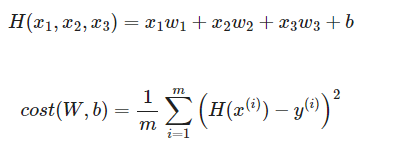  
2개 이상의 input값을 변수로 받을 때 다변량 선형 회귀 분석을 진행한다.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

### Naive Data Representation
행렬을 이용하지 않은 일반적인 방법을 다변량 회귀분석을 진행해보았다.

In [3]:
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [4]:
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([w1, w2, w3, b], lr = 1e-5)

for epoch in range(1,1001):
    hypothesis = x1_train*w1 + x2_train*w2 + x3_train*w3 + b

    cost = torch.mean((hypothesis - y_train)**2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, 1000, w1.item(), w3.item(), w3.item(), b.item(), cost.item()
        ))


Epoch  100/1000 w1: 0.673 w2: 0.676 w3: 0.676 b: 0.008 Cost: 1.564298
Epoch  200/1000 w1: 0.679 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.498250
Epoch  300/1000 w1: 0.684 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.435640
Epoch  400/1000 w1: 0.689 w2: 0.678 w3: 0.678 b: 0.008 Cost: 1.376286
Epoch  500/1000 w1: 0.694 w2: 0.678 w3: 0.678 b: 0.009 Cost: 1.320063
Epoch  600/1000 w1: 0.699 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.266731
Epoch  700/1000 w1: 0.704 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.216194
Epoch  800/1000 w1: 0.709 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.168284
Epoch  900/1000 w1: 0.713 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.122857
Epoch 1000/1000 w1: 0.718 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.079808


### Matrix Data Representation
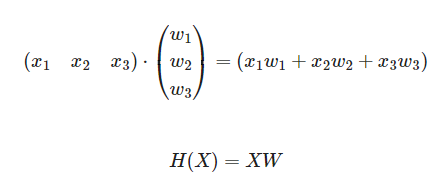

In [6]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [9]:
print(x_train.size())
print(y_train.size())

torch.Size([5, 3])
torch.Size([5, 1])


In [18]:
W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

hypothesis = x_train.matmul(W) + b
cost = torch.mean((hypothesis- y_train)**2)
print(hypothesis.squeeze())
print(hypothesis.squeeze().detach())
print(cost)
print(cost.item())

tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)
tensor([0., 0., 0., 0., 0.])
tensor(29661.8008, grad_fn=<MeanBackward0>)
29661.80078125


스칼라값을 불러올 대는 item 함수를, 텐서값을 불러올 때는 detach 함수를 이용한다.

In [23]:
W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([W ,b], lr = 1e-5)

for epoch in range(1,1001):
    hypothesis = x_train.matmul(W) + b

    cost = torch.mean((hypothesis- y_train)**2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()


    if epoch%100 == 0:
        print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, 1000, hypothesis.squeeze().detach(), cost.item()
        ))

Epoch  100/1000 hypothesis: tensor([152.7696, 183.6982, 180.9592, 197.0628, 140.1332]) Cost: 1.564303
Epoch  200/1000 hypothesis: tensor([152.7277, 183.7270, 180.9466, 197.0518, 140.1727]) Cost: 1.498253
Epoch  300/1000 hypothesis: tensor([152.6870, 183.7551, 180.9344, 197.0410, 140.2112]) Cost: 1.435649
Epoch  400/1000 hypothesis: tensor([152.6474, 183.7825, 180.9225, 197.0305, 140.2487]) Cost: 1.376286
Epoch  500/1000 hypothesis: tensor([152.6089, 183.8091, 180.9109, 197.0202, 140.2852]) Cost: 1.320053
Epoch  600/1000 hypothesis: tensor([152.5714, 183.8349, 180.8997, 197.0102, 140.3208]) Cost: 1.266726
Epoch  700/1000 hypothesis: tensor([152.5350, 183.8601, 180.8888, 197.0004, 140.3554]) Cost: 1.216194
Epoch  800/1000 hypothesis: tensor([152.4995, 183.8846, 180.8781, 196.9908, 140.3891]) Cost: 1.168279
Epoch  900/1000 hypothesis: tensor([152.4651, 183.9085, 180.8678, 196.9815, 140.4220]) Cost: 1.122853
Epoch 1000/1000 hypothesis: tensor([152.4315, 183.9316, 180.8578, 196.9724, 140.45

### High Level Implementation with nn.Module

In [25]:
from turtle import forward


class MultivariateLinearRegression(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear = nn.Linear(3,1)

    def forward(self, x:torch.tensor)->torch.tensor:
        return self.linear(x)

In [27]:
model = MultivariateLinearRegression()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/20 Cost: 31667.599609
Epoch    1/20 Cost: 9926.266602
Epoch    2/20 Cost: 3111.514160
Epoch    3/20 Cost: 975.451172
Epoch    4/20 Cost: 305.908539
Epoch    5/20 Cost: 96.042679
Epoch    6/20 Cost: 30.260782
Epoch    7/20 Cost: 9.641659
Epoch    8/20 Cost: 3.178671
Epoch    9/20 Cost: 1.152871
Epoch   10/20 Cost: 0.517862
Epoch   11/20 Cost: 0.318802
Epoch   12/20 Cost: 0.256388
Epoch   13/20 Cost: 0.236816
Epoch   14/20 Cost: 0.230657
Epoch   15/20 Cost: 0.228718
Epoch   16/20 Cost: 0.228094
Epoch   17/20 Cost: 0.227880
Epoch   18/20 Cost: 0.227803
Epoch   19/20 Cost: 0.227759
Epoch   20/20 Cost: 0.227729
